In [1]:
import mxnet as mx 
from importlib import import_module
import cv2
import matplotlib.pyplot as plt 
import numpy as np 

-----------train-----------
DataBatch: data shapes: [(128L, 3L, 28L, 28L)] label shapes: [(128L,)]
DataBatch: data shapes: [(128L, 3L, 28L, 28L)] label shapes: [(128L,)]
DataBatch: data shapes: [(128L, 3L, 28L, 28L)] label shapes: [(128L,)]
DataBatch: data shapes: [(128L, 3L, 28L, 28L)] label shapes: [(128L,)]
DataBatch: data shapes: [(128L, 3L, 28L, 28L)] label shapes: [(128L,)]
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


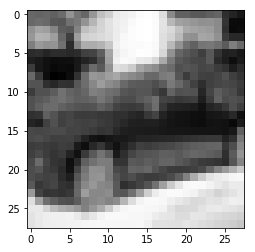

-----------val-----------
DataBatch: data shapes: [(128L, 3L, 28L, 28L)] label shapes: [(128L,)]
DataBatch: data shapes: [(128L, 3L, 28L, 28L)] label shapes: [(128L,)]
DataBatch: data shapes: [(128L, 3L, 28L, 28L)] label shapes: [(128L,)]
DataBatch: data shapes: [(128L, 3L, 28L, 28L)] label shapes: [(128L,)]
DataBatch: data shapes: [(128L, 3L, 28L, 28L)] label shapes: [(128L,)]
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


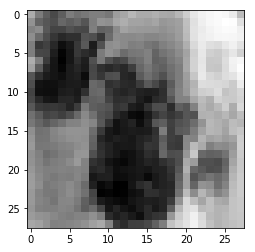

In [6]:
# 1. data reading
# labels in order: 
"""
0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck
"""

def get_cifar10():
    # TODO fill all the blanks 
    # Hint
    # rgb mean default: '123.68,116.779,103.939',
    # pad size: whatever you think is valid, pad to 32 is good 
    # image shape:  the image shape feed into the network, e.g. (3,224,224)')
    # num-classes: the number of classes
    # num-examples:  the number of training examples, 50000 :)
    # data-nthreads: default=4,number of threads for data decoding, how many cpus do you have
    # dtype: default is float32, can be data type: float32 or float16')
    train = mx.io.ImageRecordIter(
            path_imgrec         = './cifar10_train.rec',
            label_width         = 1,
            mean_r              = 123.68,
            mean_g              = 116.779,
            mean_b              = 103.939,
            data_name           = 'data',
            label_name          = 'softmax_label',
            data_shape          = (3,28,28),
            batch_size          = 128,
            pad                 = 1,
            fill_value          = 127,
            preprocess_threads  = 2,
            shuffle             = True)
    val = mx.io.ImageRecordIter(
            path_imgrec         = './cifar10_val.rec',
            label_width         = 1,
            mean_r              = 123.68,
            mean_g              = 116.779,
            mean_b              = 103.939,
            data_name           = 'data',
            label_name          = 'softmax_label',
            data_shape          = (3,28,28),
            batch_size          = 128,
            pad                 = 1,
            fill_value          = 127,
            preprocess_threads  = 2,
            shuffle             = False)
    return train, val

train, val = get_cifar10()
# TODO write the script to look what is inside train and val
# Check the image size, and label 
# Question? check MXNET_course/mxnet-week3/cifar10/step_by_step_debug.ipynb
print(train)
print(val)

def DataShow(data_iter):
    i = 0
    for each in data_iter:
        i+=1
        if i>5:
            break
        print each
    
    batch_numpy = each.data[0].asnumpy()
    label_numpy = each.label[0].asnumpy()
    print (type(batch_numpy))
    print (type(label_numpy))

    #show img
    randidx = np.random.randint(0,128)
    img = batch_numpy[randidx]
    img = np.squeeze(img).sum(axis=0)
    plt.imshow(img, cmap='gray')
    plt.show()
    
# Check the batch size and image type
print("-----------train-----------")
DataShow(train)
print("-----------val-----------")
DataShow(val)

['data', 'bn_data_gamma', 'bn_data_beta', 'conv0_weight', 'stage1_unit1_bn1_gamma', 'stage1_unit1_bn1_beta', 'stage1_unit1_conv1_weight', 'stage1_unit1_bn2_gamma', 'stage1_unit1_bn2_beta', 'stage1_unit1_conv2_weight', 'stage1_unit1_sc_weight', 'stage1_unit2_bn1_gamma', 'stage1_unit2_bn1_beta', 'stage1_unit2_conv1_weight', 'stage1_unit2_bn2_gamma', 'stage1_unit2_bn2_beta', 'stage1_unit2_conv2_weight', 'stage1_unit3_bn1_gamma', 'stage1_unit3_bn1_beta', 'stage1_unit3_conv1_weight', 'stage1_unit3_bn2_gamma', 'stage1_unit3_bn2_beta', 'stage1_unit3_conv2_weight', 'stage2_unit1_bn1_gamma', 'stage2_unit1_bn1_beta', 'stage2_unit1_conv1_weight', 'stage2_unit1_bn2_gamma', 'stage2_unit1_bn2_beta', 'stage2_unit1_conv2_weight', 'stage2_unit1_sc_weight', 'stage2_unit2_bn1_gamma', 'stage2_unit2_bn1_beta', 'stage2_unit2_conv1_weight', 'stage2_unit2_bn2_gamma', 'stage2_unit2_bn2_beta', 'stage2_unit2_conv2_weight', 'stage2_unit3_bn1_gamma', 'stage2_unit3_bn1_beta', 'stage2_unit3_conv1_weight', 'stage2_un

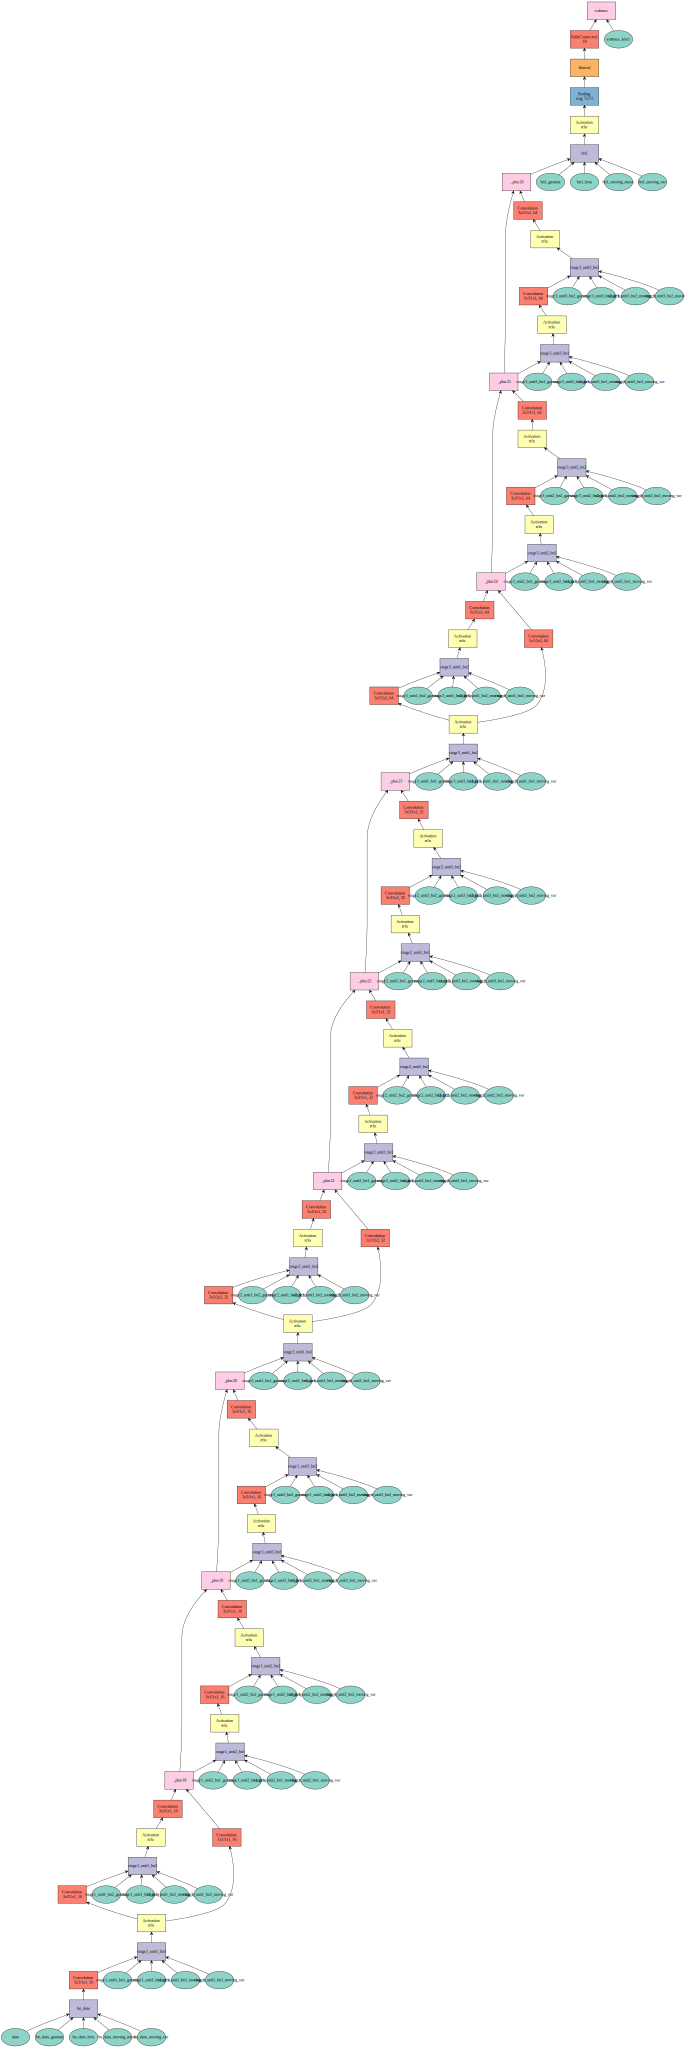

In [9]:
# 2 model getting 
# TODO read through resnet.py file for understanding
def get_resnet():
    net = import_module('resnet')
    sym = net.get_symbol(10,20,"3,28,28")
    return sym 
sym = get_resnet()

# TODO 
# 1. Plot and visualize the network. Put your comments about its architecture (why bottlenet)
# 2. List all weight and output (Question? check MXNET_course/mxnet-week3/cifar10/step_by_step_debug.ipynb)
arg_name = sym.list_arguments()
out_name = sym.list_outputs()

# Print out all weight and output
print (arg_name)
print (out_name)

# Visualize the network. The bottleneck structure is intended to reduce dimensions.
mx.viz.plot_network(sym,hide_weights=True,save_format='pdf',title='resnet8')


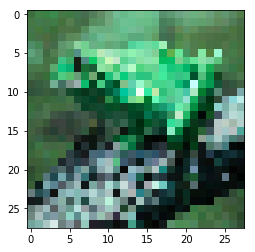

<type 'numpy.ndarray'>
(1, 3, 28, 28)


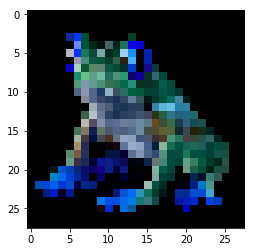

<type 'numpy.ndarray'>
(1, 3, 28, 28)
The very small training dataset contain:  (2, 3, 28, 28)
small dataset is:  <class 'mxnet.io.NDArrayIter'>
DataBatch: data shapes: [(1L, 3L, 28L, 28L)] label shapes: [(1L,)]
DataBatch: data shapes: [(1L, 3L, 28L, 28L)] label shapes: [(1L,)]


In [13]:
# 3 sanity check random image inference
img1 = cv2.imread("frog.jpg")
img1 = cv2.resize(img1,(28,28))# you need to pad it if you do padding for you nework
plt.imshow(img1)
plt.show()
print type(img1)
img1 = img1.transpose((2,0,1)).reshape((1,3,28,28))
print img1.shape

img2 = cv2.imread("frog2.jpg")
img2 = cv2.resize(img2,(28,28))# you need to pad it if you do padding for you nework
plt.imshow(img2)
plt.show()
print type(img2)
img2 = img2.transpose((2,0,1)).reshape((1,3,28,28))
print img2.shape

img = np.vstack([img1,img2])
print "The very small training dataset contain: ", img.shape

# TODO: figure out how to convert numpy array to mx.nd.array
img_mxnd = mx.nd.array(img)
label_mxnd = mx.nd.array(ctx=mx.cpu(), source_array=np.asarray([6,6])) # 6 is frog
img_itr = mx.io.NDArrayIter(img_mxnd,label = label_mxnd) # Hint the name should "data" and softmax_label

print "small dataset is: ", type(img_itr)
for each in img_itr:
    print each

# TODO bind the random img to network 
# question? check mxnet-week3/cifar10/train_cifar10.py
mod = mx.mod.Module(context=mx.cpu(),
                        symbol=sym,
                        data_names=['data'],
                        label_names=['softmax_label'])
mod.bind(img_itr.provide_data,img_itr.provide_label)
mod.init_params(mx.init.Xavier(magnitude=2.0)) 

# run forward perdiction 
# TODO fill the mod.predict 
# check mod.predict
out = mod.predict(img_itr)

In [14]:
print np.argmax(out.asnumpy(),axis=1)

[2 2]


In [15]:
# 4 overfit small dataset 
# TODO fill all ???
mod.init_params(mx.init.Xavier(magnitude=2.0)) 
mod.init_optimizer('sgd',optimizer_params=(('learning_rate', 0.1), )) 
# run forward perdiction
metric = mx.metric.create('acc')

for epoch in range(5):
    img_itr.reset()
    metric.reset()
    for batch in img_itr:
        mod.forward(batch, is_train=True)
        mod.update_metric(metric, batch.label)
        mod.backward()
        mod.update()
    print ('Epoch {}, Train {}'.format(epoch, metric.get()))
    # You should get 100% accuacy on these two images


Epoch 0, Train ('accuracy', 0.0)
Epoch 1, Train ('accuracy', 1.0)
Epoch 2, Train ('accuracy', 1.0)
Epoch 3, Train ('accuracy', 1.0)
Epoch 4, Train ('accuracy', 1.0)


/home/xiaoguan/env/mxnet/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: Parameters already initialized and force_init=False. init_params call ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
# 5 (optional) train cifar10 on resnet(~epoch) if you have GPU. Build the training script from week2
# Currently CPU is SLOW in completing this task.

import time
mod_cifar10_new = mx.mod.Module(context=mx.cpu(), symbol=sym, data_names=['data'], label_names=['softmax_label'])
mod_cifar10_new.bind(train.provide_data, train.provide_label)
mod_cifar10_new.init_params(mx.init.Xavier(magnitude=2.0))
mod_cifar10_new.init_optimizer('sgd', optimizer_params=(('learning_rate', 0.1),))
metric_cifar10_new = mx.metric.create('acc')
metric_cifar10_val = mx.metric.create('acc')

for epoch in range(30):
    train.reset()
    metric_cifar10_new.reset()
    time_start = time.time()
    for batch in train:
        mod_cifar10_new.forward(batch, is_train=True)
        mod_cifar10_new.update_metric(metric_cifar10_new, batch.label)
        mod_cifar10_new.backward()
        mod_cifar10_new.update()
    time_end = time.time()
    print('Epoch {}, Train {} in {} sec'.format(epoch, metric_cifar10_new.get(), time_end - time_start))
    
    if (epoch + 1) % 6 == 0:
        val.reset()
        print("Validation at epoch #{} Result: {}".format(epoch, mod_cifar10_new.score(val, metric_cifar10_val)))

Epoch 0, Train ('accuracy', 0.4141624040920716) in 236.992283821 sec
Epoch 1, Train ('accuracy', 0.5946091751918159) in 262.75199604 sec
Epoch 2, Train ('accuracy', 0.6774038461538462) in 262.655624151 sec
Epoch 3, Train ('accuracy', 0.7252237851662404) in 255.766991854 sec
Epoch 4, Train ('accuracy', 0.7657249040920716) in 232.319429874 sec
Epoch 5, Train ('accuracy', 0.7886017628205129) in 252.938863993 sec
Validation at epoch #5 Result: [('accuracy', 0.7582080696202531)]
Epoch 6, Train ('accuracy', 0.8127597506393862) in 249.655910969 sec
Epoch 7, Train ('accuracy', 0.8330128205128206) in 229.722533941 sec
Epoch 8, Train ('accuracy', 0.8488451086956522) in 245.584903955 sec
Epoch 9, Train ('accuracy', 0.8646898976982097) in 233.682727098 sec
Epoch 10, Train ('accuracy', 0.8770432692307693) in 226.141469002 sec
Epoch 11, Train ('accuracy', 0.8886868606138107) in 240.417256117 sec
Validation at epoch #11 Result: [('accuracy', 0.7489121835443038)]
Epoch 12, Train ('accuracy', 0.9013946

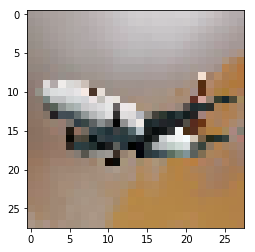

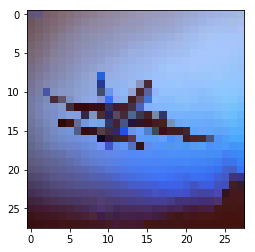

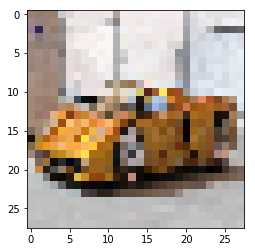

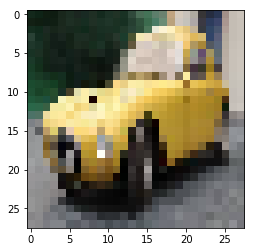

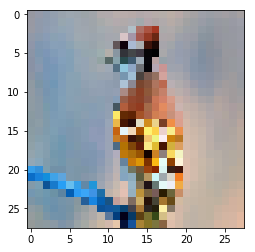

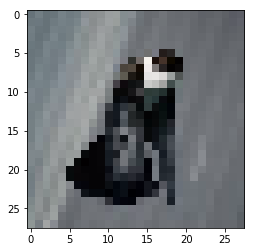

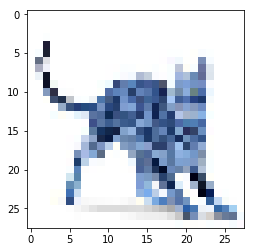

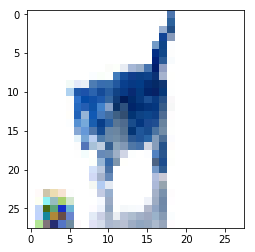

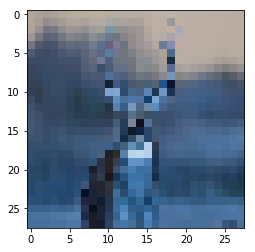

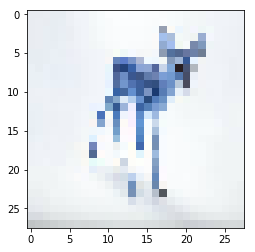

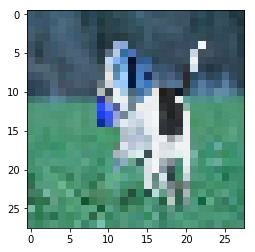

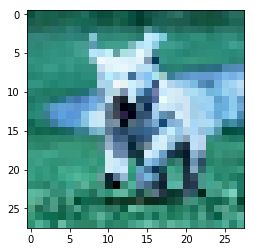

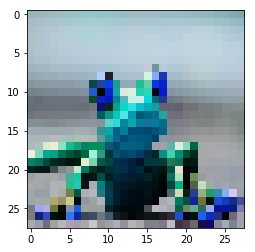

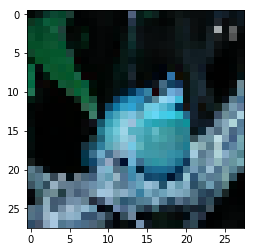

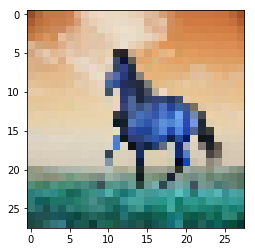

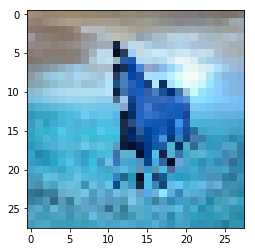

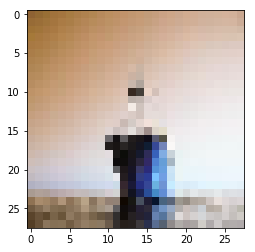

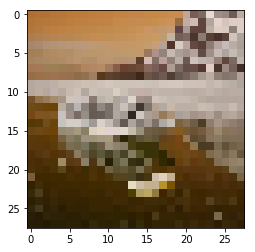

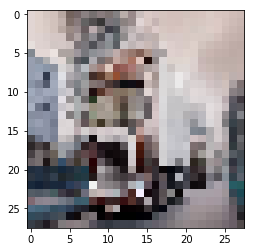

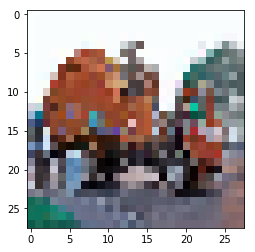

In [27]:
# 6 (optional) Wild test on your model 
# Attach the label
"""
0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck
"""
image_list = ['./test_image/airplane1.jpg', 
              './test_image/airplane2.jpg', 
              './test_image/automobile1.jpg', 
              './test_image/automobile2.jpg', 
              './test_image/bird1.jpg', 
              './test_image/bird2.jpg', 
              './test_image/cat1.jpg', 
              './test_image/cat2.jpg', 
              './test_image/deer1.jpg', 
              './test_image/deer2.jpg', 
              './test_image/dog1.jpg', 
              './test_image/dog2.jpg', 
              './test_image/frog1.jpg', 
              './test_image/frog2.jpg',
             './test_image/horse1.jpg',
             './test_image/horse2.jpg',
             './test_image/ship1.jpg',
             './test_image/ship2.jpg',
             './test_image/truck1.jpg',
             './test_image/truck2.jpg']

image_testdata = None
for image in image_list:
    img = cv2.imread(image)
    img = cv2.resize(img,(28,28))
    plt.imshow(img)
    plt.show()
    img = img.transpose((2,0,1)).reshape((1,3,28,28))
    if image_testdata is None:
        image_testdata = np.copy(img)
    else:
        image_testdata = np.vstack((image_testdata, np.copy(img)))

In [28]:
# This part will test the detection accuracy on the 20 images we have
# First we wrap the image data into mxndarray.
img_mxndtest = mx.nd.array(image_testdata)

# Obtain the label associated with each test image in the format of mxndarray.
label_mxndtest = mx.nd.array(ctx=mx.cpu(), source_array=np.asarray([0,0,1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9]))

# Bundle the image data and label into a iterated file
img_itrtest = mx.io.NDArrayIter(img_mxndtest, label_mxndtest) 

# Retrieve the model parameter from model "mod_cifar10"
arg_params, aux_params = mod_cifar10_new.get_params()

# Set up the test model.
test_mod = mx.mod.Module(context=mx.cpu(), symbol=sym, data_names=['data'], label_names=['softmax_label'])
test_mod.bind(img_itrtest.provide_data,img_itrtest.provide_label)
test_mod.set_params(arg_params, aux_params)

# Test the model accuracy

label_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

True_label = [0,0,1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9]
True_labelname = [label_name[i] for i in True_label]
print("True Label ID: {}".format(True_label))
print("True Label Name: {}".format(True_labelname))

# Run the model and obtain the output
pred_result = test_mod.predict(img_itrtest)

# Obtain the predicted label
predicted_label_ids = np.argmax(pred_result.asnumpy(),axis=1)
print("Predicted Label ID: {}".format(predicted_label_ids))

# Obtain the predicted label name
predicted_labels = [label_name[i] for i in predicted_label_ids]
print("Predicted Label Name: {}".format(predicted_labels))

# Compute the overall accuracy
metric_test = mx.metric.create('acc')
print("Overall Accuracy is {}".format(test_mod.score(img_itrtest, metric_test)))

True Label ID: [0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9]
True Label Name: ['airplane', 'airplane', 'automobile', 'automobile', 'bird', 'bird', 'cat', 'cat', 'deer', 'deer', 'dog', 'dog', 'frog', 'frog', 'horse', 'horse', 'ship', 'ship', 'truck', 'truck']
Predicted Label ID: [0 0 9 1 2 6 0 0 2 0 7 0 8 9 7 0 4 0 9 9]
Predicted Label Name: ['airplane', 'airplane', 'truck', 'automobile', 'bird', 'frog', 'airplane', 'airplane', 'bird', 'airplane', 'horse', 'airplane', 'ship', 'truck', 'horse', 'airplane', 'deer', 'airplane', 'truck', 'truck']
Overall Accuracy is [('accuracy', 0.35)]


In [23]:
help(mod_cifar10_new)

Help on Module in module mxnet.module.module object:

class Module(mxnet.module.base_module.BaseModule)
 |  Module is a basic module that wrap a `Symbol`. It is functionally the same
 |  as the `FeedForward` model, except under the module API.
 |  
 |  Parameters
 |  ----------
 |  symbol : Symbol
 |  data_names : list of str
 |      Defaults to `('data')` for a typical model used in image classification.
 |  label_names : list of str
 |      Defaults to `('softmax_label')` for a typical model used in image
 |      classification.
 |  logger : Logger
 |      Defaults to `logging`.
 |  context : Context or list of Context
 |      Defaults to ``mx.cpu()``.
 |  work_load_list : list of number
 |      Default ``None``, indicating uniform workload.
 |  fixed_param_names: list of str
 |      Default ``None``, indicating no network parameters are fixed.
 |  state_names : list of str
 |      states are similar to data and label, but not provided by data iterator.
 |      Instead they are initi